# Project: Wrangling and Analyze Data

## Data Gathering

importing needed libraries for this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import datetime
import seaborn as sns
%matplotlib inline

#### importing WeRateDogs Twitter Archive

In [2]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### 2. programmatically downloading tweet image prediction

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image_prediction.tsv', 'wb') as file:
    image_prediction = requests.get(url)
    file.write(image_prediction.content)
image_prediction = pd.read_csv('image_prediction.tsv', sep = '\t')
image_prediction.head(2)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### 3. importing tweet_json file and reading it line by line into a pandas dataframe

In [4]:
tweets= pd.read_json('tweet_json.txt' ,lines = True, encoding = 'utf-8')
tweets.head(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


select only required columns from the tweets dataframe

In [5]:
tweets = tweets[['id', 'favorite_count', 'retweet_count']]

In [6]:
tweets.head(2)

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514


## Assessing Data
In this section, i will be detecting and documenting at least **eight (8) quality issues and two (2) tidiness issue**. i will be using **both** visual assessment and 
programmatic assessement to assess the data.


 **Visually  And Programmatically Assessing Twitter_archive Dataset**

In [7]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [9]:
twitter_archive.shape

(2356, 17)

In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
twitter_archive.duplicated().sum()

0

In [12]:
twitter_archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1476,693629975228977152,NaN,NaN,2016-01-31 03:00:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is afraid of its own feet. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693629975...,12,10,None,None,None,pupper,None


In [13]:
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

**Visually and Programmatically Assessing Image Prediction Dataset**

In [14]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
image_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [16]:
image_prediction.shape

(2075, 12)

In [17]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_prediction.duplicated().sum()

0

In [19]:
image_prediction.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

**Visually and Programmatically Assessing tweet stats**

In [20]:
tweets.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [21]:
tweets.tail()

,id,favorite_count,retweet_count
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48
2353,666020888022790149,2535,532


In [22]:
tweets.shape

(2354, 3)

In [23]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [24]:
tweets.duplicated().sum()

0

In [25]:
tweets.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [26]:
tweets.nunique()

id                2354
favorite_count    2007
retweet_count     1724
dtype: int64

### Quality issues
1. Missing values in the twitter archive dataset


2. Incorrect data types in datasets


3. Incorrect data format for timestamp


4. When no value exist None is used


5. There are names of dogs that seems to be incorrect sunch as dogs named 'an' and 'a' 


6. Rating_denominator columns contains roles with number greater than 10


7. twitter_archieve datasets have more tweet_id(2356) than image_prediction datasets(2075) and tweets stats(2354)

8. Unexpected values in rating_numerator

### Tidiness issues
1. There are three datasets for this project, a single dataset called 'twitter_archive_master' would be created from all three datasets


2. The dog stage variable is separated into four columns called ('doggo','floofer','pupper','puppo'), all four columns would be merged into a single column called dogstage


## Cleaning Data
In this section, i would be cleaning **all** of the issues i documented while assessing. 

In [27]:
# Making copies of original datasets
twitter_df = twitter_archive.copy() 
image_df = image_prediction.copy()
tweets_df = tweets.copy()

### Issue 1: 
Missing values in the twitter archive dataset

#### Define: some columns in the  Twitter archive dataset contains null values, and this columns would be corrected

#### Code

In [28]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

the columns needed for the analysis are tweet_id, timestamp, source, text, rating numerator, rating denominator, name, doggo, floofer, pupper and puppo have no null values. the other columns containing null values would be removed

In [29]:
twitter_df = twitter_df[['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

#### Test

In [30]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(8)
memory usage: 202.5+ KB


In [31]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


**All three datasets are currently clear of null values**

### Issue 2: Incorrect data types in datasets

#### Define: 
some columns such as twitter_id on the twitter_df dataframe has a int64 datatype and should be a string for better aanalysis of this project

#### Code

### twitter_df dataframe

In [33]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(8)
memory usage: 202.5+ KB


In [34]:
twitter_df['tweet_id'] = twitter_df['tweet_id'].astype(object)

### image_df dataset

In [35]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
image_df['tweet_id'] = twitter_df['tweet_id'].astype(object)

### tweets_df

In [37]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [38]:
tweets_df['id'] = tweets_df['id'].astype(object)

#### Test

In [39]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(2), object(9)
memory usage: 202.5+ KB


In [40]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [41]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


## Issue 4: Incorrect data format for timestamp

### Define: 
    The timestamp column on the twitter archive dataframe has incorrect data type and also consist of some characters that are alien to time format. this alien characters would be removed

### code

In [42]:
twitter_df['timestamp'] = pd.to_datetime(twitter_df['timestamp'])

### Test

In [43]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 202.5+ KB


> All datatypes and format are now correct

## Issue 5: combining separated columns and removing more columns not required for this project analysis

#### Define: 
* some columns needs to be combined to form a single column, such as the different dogstages (doggo,floofer,pupper and puppo) column in the twitter dataframe and the p1,p2 and p3 columns on the image dataframe

* removing columns that could be a repeatation such as doggo, floofer after the dogstage column has been created

 ### code

creating a new column called dogstage from the different dog stages on the twitter dataframe

In [44]:
twitter_df['dogstage'] = twitter_df['text'].str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [45]:
twitter_df['dogstage'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dogstage, dtype: int64

In [46]:
#drop the different dog stage columns as they are no longer needed
twitter_df = twitter_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

#### image_df
creating a new column called image from the different dog stages on the image_prediction dataframe

In [47]:
image_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,892177421306343426,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [48]:
breed = []
todrop =[]

for values in image_df.index:
    if image_df.iloc[values].p1_dog:
        breed += [image_df.iloc[values].p1]
    elif image_df.iloc[values].p2_dog:
        breed += [image_df.iloc[values].p2]
    elif image_df.iloc[values].p3_dog:    
        breed += [image_df.iloc[values].p3]
    else:
        todrop += [values]
        
image_df.drop(index = todrop, inplace = True)   
image_df.insert(2, "dog_breed", breed, False) 

> removing more columns that wont be needed for analysis from the image dataframe

In [49]:
image_df = image_df.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

### Test

In [50]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dogstage              399 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 147.3+ KB


In [51]:
twitter_df.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN


In [52]:
#checking the creeated columns for twitter_df
twitter_df.dogstage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dogstage, dtype: int64

### image_df2

In [53]:
image_df.head(2)

,tweet_id,jpg_url,dog_breed
0,892420643555336193,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,892177421306343426,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone


In [54]:
image_df.shape

(1751, 3)

In [55]:
image_df.dog_breed.value_counts()

golden_retriever                  173
Labrador_retriever                113
Pembroke                           96
Chihuahua                          95
pug                                65
toy_poodle                         52
chow                               51
Samoyed                            46
Pomeranian                         42
malamute                           34
cocker_spaniel                     34
French_bulldog                     32
Chesapeake_Bay_retriever           31
miniature_pinscher                 26
Cardigan                           23
Staffordshire_bullterrier          22
Eskimo_dog                         22
German_shepherd                    21
beagle                             21
Siberian_husky                     20
Shih-Tzu                           20
Shetland_sheepdog                  19
Rottweiler                         19
Lakeland_terrier                   19
Maltese_dog                        19
kuvasz                             19
basset      

In [56]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 3 columns):
tweet_id     1751 non-null object
jpg_url      1751 non-null object
dog_breed    1751 non-null object
dtypes: object(3)
memory usage: 54.7+ KB


## Issue 6: Combining the three datasets

#### Details:
 The three datasets are going to be merged into a single dataset using the tweet_id columns

In [57]:
twitter_df.shape

(2356, 8)

In [58]:
image_df.shape

(1751, 3)

In [59]:
tweets_df.shape

(2354, 3)

The three datasets are not structurally balance, the image_df contains less rows, this simply implies that some tweets are missing in the image dataframe, the image dataframe would be used as a yardstick for tweets that would be analyzed

In [60]:
#remaning the id column in tweets_df to tweet_id, so it matches with the other dataframes
tweets_df = tweets_df.rename(columns = {'id' : 'tweet_id'})
tweets_df.head(2)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514


create a new dataframe called twitter_archive_master

In [61]:
twitter_archive_master= pd.merge(twitter_df, image_df, on  = 'tweet_id', how = 'inner')

In [62]:
twitter_archive_master = pd.merge(twitter_archive_master, tweets_df, on = 'tweet_id', how = 'inner')

In [63]:
twitter_archive_master.shape

(1749, 12)

In [64]:
twitter_archive_master.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage,jpg_url,dog_breed,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,39467,8853
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,33819,6514


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [76]:
twitter_archive_master.to_csv('twitter_archive_master.csv',encoding = 'utf-8' ,index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [66]:
twitter_archive_master.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage,jpg_url,dog_breed,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,39467,8853
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,33819,6514


### Insights:
1. Top 10 names for dogs

2. Top 10 most common dog breeds

3. tweets with the highest favourite count and retweet count

4. correlation between date tweet was posted, favorite_count and retweet_count


### Visualization

1)    Top 10 dog names

In [67]:
top10_names = twitter_archive_master.name.value_counts().iloc[2:12].reset_index()
top10_names = top10_names.rename(columns ={'index' :'names','name':'frequency'})
top10_names

,names,frequency
0,Cooper,11
1,Lucy,10
2,Oliver,10
3,Charlie,10
4,Penny,8
5,Lola,8
6,Bailey,7
7,Bo,7
8,Sadie,7
9,Tucker,7


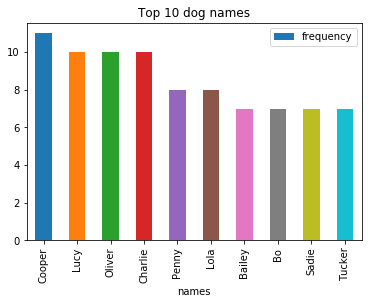

In [68]:
top10_names.plot(x= 'names', y= 'frequency', kind = 'bar').set_title("Top 10 dog names")
plt.show()

2 Top 10 most common dog breeds

In [69]:
top10_breeds = twitter_archive_master.dog_breed.value_counts().iloc[:10].reset_index()
top10_breeds = top10_breeds.rename(columns ={'index' :'breed','dog_breed':'frequency'})
top10_breeds

,breed,frequency
0,golden_retriever,173
1,Labrador_retriever,113
2,Pembroke,96
3,Chihuahua,95
4,pug,65
5,toy_poodle,52
6,chow,51
7,Samoyed,45
8,Pomeranian,42
9,malamute,34


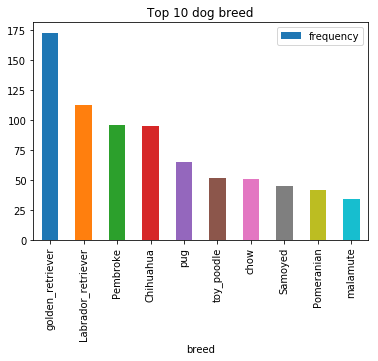

In [70]:
top10_breeds.plot(x= 'breed', y= 'frequency', kind = 'bar').set_title("Top 10 dog breed")
plt.show()

3 tweets with the highest favourite count and retweet count

In [71]:
twitter_archive_master[['favorite_count', 'retweet_count']].describe()

,favorite_count,retweet_count
count,1749.000000,1749.000000
mean,8677.552887,3336.931961
std,11976.141196,5247.981686
min,0.000000,0.000000
25%,2152.000000,827.000000
50%,4188.000000,1703.000000
75%,10937.000000,3895.000000
max,132810.000000,79515.000000


In [72]:
top10_favorite_count = twitter_archive_master[['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dogstage', 'jpg_url', 'dog_breed',
       'favorite_count']].sort_values('favorite_count', ascending = False).head(5).reset_index(drop = True)
top10_favorite_count

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage,jpg_url,dog_breed,favorite_count
0,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,13,10,None,puppo,https://pbs.twimg.com/media/CVpgPGwWoAEV7gG.jpg,pug,132810
1,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,13,10,None,doggo,https://pbs.twimg.com/media/CeHWFksXIAAyypp.jpg,Shih-Tzu,131075
2,879415818425184262,2017-06-26 19:07:24,This is Duddles. He did an attempt. 13/10 some...,13,10,Duddles,NaN,https://pbs.twimg.com/media/CUJJLtWWsAE-go5.jpg,soft-coated_wheaten_terrier,107956
3,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,NaN,https://pbs.twimg.com/media/CWT2MUgWIAECWig.jpg,Chesapeake_Bay_retriever,107015
4,866450705531457537,2017-05-22 00:28:40,This is Jamesy. He gives a kiss to every other...,13,10,Jamesy,pupper,https://pbs.twimg.com/media/CUb6ebKWcAAJkd0.jpg,Staffordshire_bullterrier,106827


retweet counts

In [73]:
top10_retweet_count = twitter_archive_master[['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dogstage', 'jpg_url', 'dog_breed',
       'retweet_count']].sort_values('retweet_count', ascending = False).head(5).reset_index(drop = True)
top10_retweet_count

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage,jpg_url,dog_breed,retweet_count
0,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,13,10,None,doggo,https://pbs.twimg.com/media/CeHWFksXIAAyypp.jpg,Shih-Tzu,79515
1,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,NaN,https://pbs.twimg.com/media/CWT2MUgWIAECWig.jpg,Chesapeake_Bay_retriever,56625
2,739238157791694849,2016-06-04 23:31:25,Here's a doggo blowing bubbles. It's downright...,13,10,None,doggo,https://pbs.twimg.com/media/CfZJTphWAAAl5Ys.jpg,Brittany_spaniel,52360
3,770743923962707968,2016-08-30 22:04:05,RT @dog_rates: Here's a doggo blowing bubbles....,13,10,None,doggo,https://pbs.twimg.com/media/CZ2uU37UcAANzmK.jpg,soft-coated_wheaten_terrier,52360
4,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,13,10,None,puppo,https://pbs.twimg.com/media/CVpgPGwWoAEV7gG.jpg,pug,48265


4) correlation between date tweet was posted, favorite_count and retweet_count

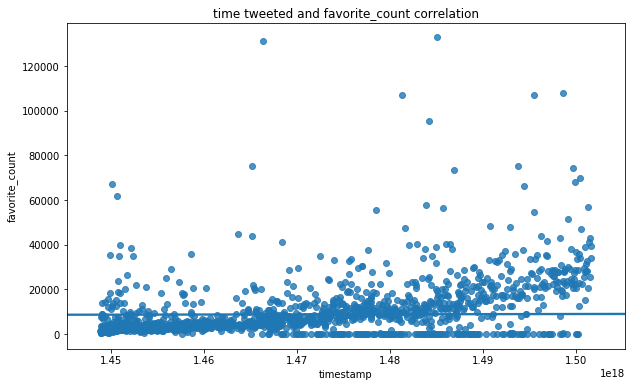

In [74]:
plt.figure(figsize=(10,6))
sns.regplot(data = twitter_archive_master, x =twitter_archive_master['timestamp'].astype(int), y = 'favorite_count').set(title = 'time tweeted and favorite_count correlation')
plt.show()

correlation between date tweet was posted and retweet_count

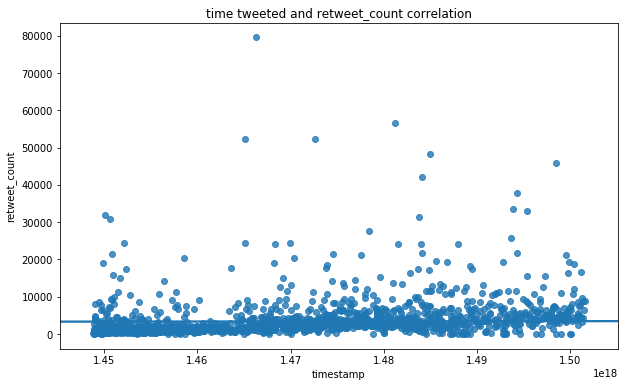

In [75]:
plt.figure(figsize=(10,6))
sns.regplot(data = twitter_archive_master, x =twitter_archive_master['timestamp'].astype(int), y = 'retweet_count').set(title = 'time tweeted and retweet_count correlation')
plt.show()